In [1]:
from uninaannpy import neural_network as nn
from uninaannpy import error_functions as ef
from uninaannpy import activation_functions as af
from uninaannpy import datasets as ds
from uninaannpy import utility as ut

import numpy as np
import pandas as pd

#Lettura csv con pandas
train_data = pd.read_csv('data/mnist_train.csv')
test_data = pd.read_csv('data/mnist_test.csv')

#Ottenimento array per il training e il testing
train_array = np.array(train_data)
test_array = np.array(test_data)

#Estrapoliamo il numero di righe e di colonne di train e test
train_rows, train_cols = train_array.shape 
test_rows, test_cols = test_array.shape  

#Mescola casualmente i dati prima di suddividerli in set di sviluppo e training
np.random.shuffle(train_array)  
#Calcolo percentuale dati per il validation set
validation_percentage = 0.20
val_index = int(np.ceil(train_rows * validation_percentage))

#Distribuzione training, validation e test set
train_in, train_labels = ds.get_mnist_training(train_array, train_rows, train_cols, val_index)
validation_in, validation_labels = ds.get_mnist_validation(train_array, train_cols, val_index)
test_in, test_labels = ds.get_mnist_testing(test_array, test_cols, test_rows)

#Creazione rete neurale
#Assegnazione funzioni di attivazione per ogni strato della rete
hidden_activation_functions = [af.relu, af.relu, af.relu]

#Assegnazione numero di neuroni per ogni strato
hidden_layers = [30, 30, 30]
#Assegnazione della funzione di attivazione e di errore per l'ultimo strato della rete
output_activation_function = af.identity
error_function = ef.cross_entropy_softmax

#Estrazione input e target
input_layer_size = train_in.shape[0]
output_layer_size = train_labels.shape[0]
net = nn.NeuralNetwork(hidden_activation_functions, output_activation_function, error_function,
                input_layer_size, hidden_layers, output_layer_size)

#Copia la rete principale in quattro per il training
std_training_net = net.duplicate_network()
plus_training_net = net.duplicate_network()
istd_training_net = net.duplicate_network()
iplus_training_net = net.duplicate_network()

std_training_net.get_net_structure()

Numero di strati nascosti: 3
Dimensione dell'input: 784
Dimensione dell'output: 10
Neuroni negli strati nascosti: 30, 30, 30
Funzioni di attivazione: relu, relu, relu, identity
Funzione di errore: cross_entropy_softmax


In [2]:
from uninaannpy.neural_network import RPropType

# Batch training rProp standard
std_train_err, std_validation_err, std_train_accuracy, std_validation_accuracy = std_training_net.train_neural_network(train_in, train_labels, validation_in, validation_labels, epochs=30, learning_rate=0.00001, rprop_type=RPropType.STANDARD)


Epoca: 0/30    rProp utilizzata: RPropType.STANDARD
    Training Accuracy: 10.2398%,
    Validation Accuracy: 10.55088%

Epoca: 1/30   rProp utilizzata: RPropType.STANDARD
    Training Accuracy: 10.86689%,
    Validation Accuracy: 11.13426%

Epoca: 2/30   rProp utilizzata: RPropType.STANDARD
    Training Accuracy: 19.17748%,
    Validation Accuracy: 19.85165%

Epoca: 3/30   rProp utilizzata: RPropType.STANDARD
    Training Accuracy: 16.28367%,
    Validation Accuracy: 16.10968%

Epoca: 4/30   rProp utilizzata: RPropType.STANDARD
    Training Accuracy: 14.40238%,
    Validation Accuracy: 13.9845%

Epoca: 5/30   rProp utilizzata: RPropType.STANDARD
    Training Accuracy: 13.63153%,
    Validation Accuracy: 13.20943%

Epoca: 6/30   rProp utilizzata: RPropType.STANDARD
    Training Accuracy: 20.88377%,
    Validation Accuracy: 21.78515%

Epoca: 7/30   rProp utilizzata: RPropType.STANDARD
    Training Accuracy: 24.36509%,
    Validation Accuracy: 25.2521%

Epoca: 8/30   rProp utilizzata: R

In [3]:
from uninaannpy.neural_network import RPropType

# Batch training rProp con weight-backtracking
plus_train_err, plus_validation_err, plus_train_accuracy, plus_validation_accuracy = plus_training_net.train_neural_network(train_in, train_labels, validation_in, validation_labels, epochs=30, learning_rate=0.00001, rprop_type=RPropType.RPROP_PLUS)


Epoca: 0/30    rProp utilizzata: RPropType.RPROP_PLUS
    Training Accuracy: 10.2398%,
    Validation Accuracy: 10.55088%

Epoca: 1/30   rProp utilizzata: RPropType.RPROP_PLUS
    Training Accuracy: 10.86689%,
    Validation Accuracy: 11.13426%

Epoca: 2/30   rProp utilizzata: RPropType.RPROP_PLUS
    Training Accuracy: 19.53999%,
    Validation Accuracy: 20.29336%

Epoca: 3/30   rProp utilizzata: RPropType.RPROP_PLUS
    Training Accuracy: 9.94604%,
    Validation Accuracy: 9.70081%

Epoca: 4/30   rProp utilizzata: RPropType.RPROP_PLUS
    Training Accuracy: 19.95458%,
    Validation Accuracy: 19.86832%

Epoca: 5/30   rProp utilizzata: RPropType.RPROP_PLUS
    Training Accuracy: 16.64618%,
    Validation Accuracy: 16.02634%

Epoca: 6/30   rProp utilizzata: RPropType.RPROP_PLUS
    Training Accuracy: 20.46709%,
    Validation Accuracy: 20.54338%

Epoca: 7/30   rProp utilizzata: RPropType.RPROP_PLUS
    Training Accuracy: 20.43376%,
    Validation Accuracy: 20.71839%

Epoca: 8/30   rPr

In [4]:
from uninaannpy.neural_network import RPropType

# Batch training improved rProp con weight-backtracking
istd_train_err, istd_validation_err, istd_train_accuracy, istd_validation_accuracy = istd_training_net.train_neural_network(train_in, train_labels, validation_in, validation_labels, epochs=30, learning_rate=0.00001, rprop_type=RPropType.IRPROP)


Epoca: 0/30    rProp utilizzata: RPropType.IRPROP
    Training Accuracy: 10.2398%,
    Validation Accuracy: 10.55088%

Epoca: 1/30   rProp utilizzata: RPropType.IRPROP
    Training Accuracy: 10.86689%,
    Validation Accuracy: 11.13426%

Epoca: 2/30   rProp utilizzata: RPropType.IRPROP
    Training Accuracy: 19.17748%,
    Validation Accuracy: 19.85165%

Epoca: 3/30   rProp utilizzata: RPropType.IRPROP
    Training Accuracy: 16.51909%,
    Validation Accuracy: 16.30969%

Epoca: 4/30   rProp utilizzata: RPropType.IRPROP
    Training Accuracy: 18.10038%,
    Validation Accuracy: 18.30986%

Epoca: 5/30   rProp utilizzata: RPropType.IRPROP
    Training Accuracy: 24.11509%,
    Validation Accuracy: 23.93533%

Epoca: 6/30   rProp utilizzata: RPropType.IRPROP
    Training Accuracy: 16.88994%,
    Validation Accuracy: 16.90974%

Epoca: 7/30   rProp utilizzata: RPropType.IRPROP
    Training Accuracy: 19.83375%,
    Validation Accuracy: 20.46004%

Epoca: 8/30   rProp utilizzata: RPropType.IRPRO

In [5]:
from uninaannpy.neural_network import RPropType

# Batch training improved rProp
iplus_train_err, iplus_validation_err, iplus_train_accuracy, iplus_validation_accuracy = iplus_training_net.train_neural_network(train_in, train_labels, validation_in, validation_labels, epochs=30, learning_rate=0.00001, rprop_type=RPropType.IRPROP_PLUS)


Epoca: 0/30    rProp utilizzata: RPropType.IRPROP_PLUS
    Training Accuracy: 10.2398%,
    Validation Accuracy: 10.55088%

Epoca: 1/30   rProp utilizzata: RPropType.IRPROP_PLUS
    Training Accuracy: 10.86689%,
    Validation Accuracy: 11.13426%

Epoca: 2/30   rProp utilizzata: RPropType.IRPROP_PLUS
    Training Accuracy: 19.53999%,
    Validation Accuracy: 20.29336%

Epoca: 3/30   rProp utilizzata: RPropType.IRPROP_PLUS
    Training Accuracy: 9.94604%,
    Validation Accuracy: 9.70081%

Epoca: 4/30   rProp utilizzata: RPropType.IRPROP_PLUS
    Training Accuracy: 19.95458%,
    Validation Accuracy: 19.86832%

Epoca: 5/30   rProp utilizzata: RPropType.IRPROP_PLUS
    Training Accuracy: 16.64618%,
    Validation Accuracy: 16.02634%

Epoca: 6/30   rProp utilizzata: RPropType.IRPROP_PLUS
    Training Accuracy: 20.46709%,
    Validation Accuracy: 20.54338%

Epoca: 7/30   rProp utilizzata: RPropType.IRPROP_PLUS
    Training Accuracy: 20.43376%,
    Validation Accuracy: 20.71839%

Epoca: 8/

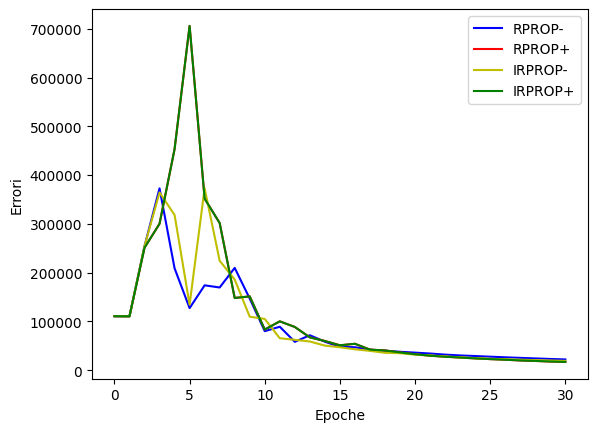

In [6]:
from matplotlib import pyplot as plt

# Stampa grafico dell'errore del training
plt.figure()
plt.plot(std_train_err, 'b', label='RPROP-')
plt.plot(plus_train_err, 'r', label='RPROP+')
plt.plot(istd_train_err, 'y', label='IRPROP-')
plt.plot(iplus_train_err, 'g', label='IRPROP+')
plt.xlabel('Epoche')
plt.ylabel('Errori')
plt.legend()
plt.show()

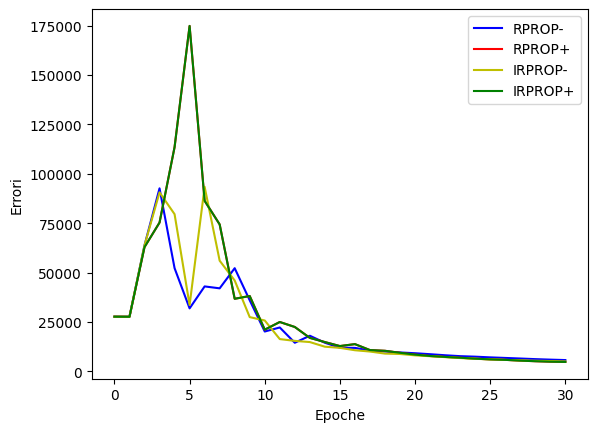

In [7]:
# Stampa grafico dell'errore del validation
plt.figure()
plt.plot(std_validation_err, 'b', label='RPROP-')
plt.plot(plus_validation_err, 'r', label='RPROP+')
plt.plot(istd_validation_err, 'y', label='IRPROP-')
plt.plot(iplus_validation_err, 'g', label='IRPROP+')
plt.xlabel('Epoche')
plt.ylabel('Errori')
plt.legend()
plt.show()

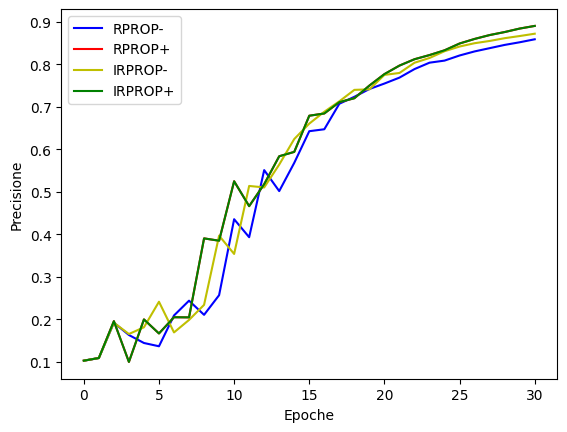

In [8]:
# Stampa grafico della precisione del training
plt.figure()
plt.plot(std_train_accuracy, 'b', label='RPROP-')
plt.plot(plus_train_accuracy, 'r', label='RPROP+')
plt.plot(istd_train_accuracy, 'y', label='IRPROP-')
plt.plot(iplus_train_accuracy, 'g', label='IRPROP+')
plt.xlabel('Epoche')
plt.ylabel('Precisione')
plt.legend()
plt.show()

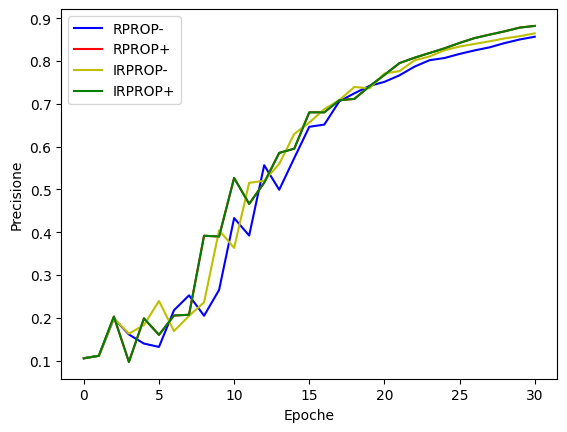

In [9]:
# Stampa grafico della precisione del validation
plt.figure()
plt.plot(std_validation_accuracy, 'b', label='RPROP-')
plt.plot(plus_validation_accuracy, 'r', label='RPROP+')
plt.plot(istd_validation_accuracy, 'y', label='IRPROP-')
plt.plot(iplus_validation_accuracy, 'g', label='IRPROP+')
plt.xlabel('Epoche')
plt.ylabel('Precisione')
plt.legend()
plt.show()

In [10]:
#Stampa accuracy per training e test set
std_accuracy_test = std_training_net.network_accuracy(test_in, test_labels)
print(f'Test accuracy: {std_accuracy_test}%')
std_accuracy_training = std_training_net.network_accuracy(train_in, train_labels)
print(f'Train accuracy: {std_accuracy_training}%')


plus_accuracy_test = plus_training_net.network_accuracy(test_in, test_labels)
print(f'Test accuracy: {plus_accuracy_test}%')
plus_accuracy_training = plus_training_net.network_accuracy(train_in, train_labels)
print(f'Train accuracy: {plus_accuracy_training}%')


istd_accuracy_test = istd_training_net.network_accuracy(test_in, test_labels)
print(f'Test accuracy: {istd_accuracy_test}%')
istd_accuracy_training = istd_training_net.network_accuracy(train_in, train_labels)
print(f'Train accuracy: {istd_accuracy_training}%')


iplus_accuracy_test = iplus_training_net.network_accuracy(test_in, test_labels)
print(f'Test accuracy: {iplus_accuracy_test}%')
iplus_accuracy_training = iplus_training_net.network_accuracy(train_in, train_labels)
print(f'Train accuracy: {iplus_accuracy_training}%')

Test accuracy: 82.92994%
Train accuracy: 85.91012%
Test accuracy: 86.24204%
Train accuracy: 89.05811%
Test accuracy: 85.35032%
Train accuracy: 87.22473%
Test accuracy: 86.24204%
Train accuracy: 89.05811%


Test rProp-
Probabilità predette dalla rete non addestrata:
Classe 0: 11.74173%
Classe 1: 9.23292%
Classe 2: 9.43619%
Classe 3: 10.34669%
Classe 4: 9.79674%
Classe 5: 8.68059%
Classe 6: 9.68793%
Classe 7: 9.97075%
Classe 8: 9.47457%
Classe 9: 11.63188%

Probabilità predette dalla rete addestrata:
Classe 0: 0.0%
Classe 1: 95.24012%
Classe 2: 0.34801%
Classe 3: 3.17915%
Classe 4: 0.01477%
Classe 5: 0.00133%
Classe 6: 0.00635%
Classe 7: 0.02328%
Classe 8: 1.1808%
Classe 9: 0.00618%
Test rProp+
Probabilità predette dalla rete non addestrata:
Classe 0: 11.74173%
Classe 1: 9.23292%
Classe 2: 9.43619%
Classe 3: 10.34669%
Classe 4: 9.79674%
Classe 5: 8.68059%
Classe 6: 9.68793%
Classe 7: 9.97075%
Classe 8: 9.47457%
Classe 9: 11.63188%

Probabilità predette dalla rete addestrata:
Classe 0: 0.0%
Classe 1: 99.79772%
Classe 2: 0.02311%
Classe 3: 0.01011%
Classe 4: 0.00744%
Classe 5: 0.01877%
Classe 6: 0.00097%
Classe 7: 0.00065%
Classe 8: 0.10594%
Classe 9: 0.0353%
Test irProp-
Probabilità predett

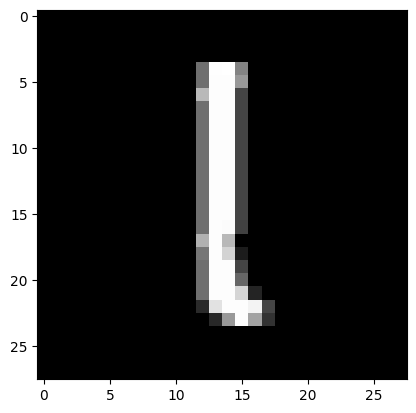

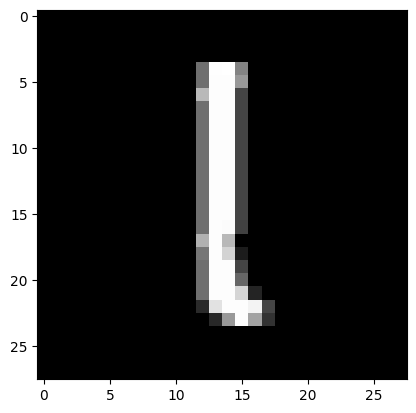

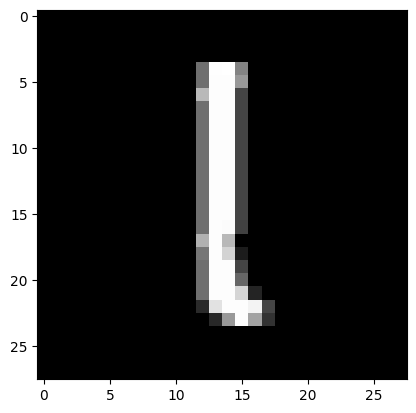

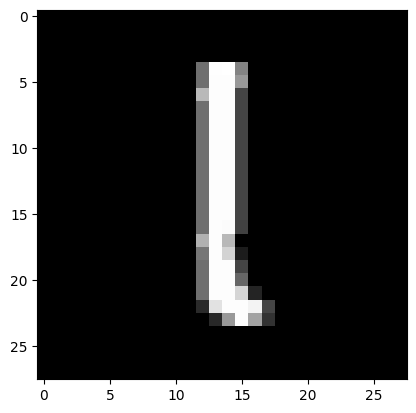

In [11]:
#Predizione rete senza addestramento e rete addestrata
image = 47998

print('Test rProp-')
ut.test_prediction(net, std_training_net, image, train_in)
print('Test rProp+')
ut.test_prediction(net, plus_training_net, image, train_in)
print('Test irProp-')
ut.test_prediction(net, istd_training_net, image, train_in)
print('Test irProp+')
ut.test_prediction(net, iplus_training_net, image, train_in)